In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.svm import SVC

In [73]:
df = pd.read_csv("election2024.csv")

In [74]:
df.head()

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,07169ed8148ce047,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,NaN,farming,1.445172
1,0716a4f3354cecdd,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade,1.445172
2,0716889b304ce79c,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency,1.301691
3,07168e28b5cce563,male,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,NaN,NaN,1.538628
4,0716a563914ce549,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,commercial organization,"tech, programming, communications",1.967015


In [75]:
df.shape

(1600, 16)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1600 non-null   object 
 1   sex                  1600 non-null   object 
 2   age                  1600 non-null   float64
 3   federal_district     1600 non-null   object 
 4   type_of_city         1600 non-null   object 
 5   knows_election_date  1600 non-null   object 
 6   will_vote            1600 non-null   object 
 7   candidate            1600 non-null   object 
 8   television_usage     1600 non-null   object 
 9   internet_usage       1600 non-null   object 
 10  education            1600 non-null   object 
 11  income               1600 non-null   object 
 12  employment           1600 non-null   object 
 13  job_type             692 non-null    object 
 14  company_type         879 non-null    object 
 15  weight1              1600 non-null   f

In [77]:
print(df.describe())


               age      weight1
count  1600.000000  1600.000000
mean     49.936250     1.000000
std      16.901797     0.327084
min      18.000000     0.468226
25%      37.000000     0.772224
50%      49.000000     0.921724
75%      64.000000     1.158913
max      90.000000     2.515072


Fixing weight1 column name

In [78]:
df.rename(columns = {"weight1":"weight"},inplace = True)

### Handle Missing Values

In [79]:
df.isnull().sum()

id                       0
sex                      0
age                      0
federal_district         0
type_of_city             0
knows_election_date      0
will_vote                0
candidate                0
television_usage         0
internet_usage           0
education                0
income                   0
employment               0
job_type               908
company_type           721
weight                   0
dtype: int64

In [80]:
df[["job_type","company_type"]]

,job_type,company_type
0,NaN,farming
1,commercial organization,trade
2,law enforcement agency,law enforcement agency
3,NaN,NaN
4,commercial organization,"tech, programming, communications"
...,...,...
1595,NaN,NaN
1596,NaN,NaN
1597,NaN,NaN
1598,commercial organization,"industry, manufacturing"


In [81]:
df[["job_type","company_type"]].mode()

,job_type,company_type
0,commercial organization,"industry, manufacturing"


Replace null values with mode for categorical data

In [82]:
df.fillna(df[["job_type","company_type"]].mode().iloc[0], inplace=True)

In [83]:
df.isnull().sum()

id                     0
sex                    0
age                    0
federal_district       0
type_of_city           0
knows_election_date    0
will_vote              0
candidate              0
television_usage       0
internet_usage         0
education              0
income                 0
employment             0
job_type               0
company_type           0
weight                 0
dtype: int64

## Univariate Analysis

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1600 non-null   object 
 1   sex                  1600 non-null   object 
 2   age                  1600 non-null   float64
 3   federal_district     1600 non-null   object 
 4   type_of_city         1600 non-null   object 
 5   knows_election_date  1600 non-null   object 
 6   will_vote            1600 non-null   object 
 7   candidate            1600 non-null   object 
 8   television_usage     1600 non-null   object 
 9   internet_usage       1600 non-null   object 
 10  education            1600 non-null   object 
 11  income               1600 non-null   object 
 12  employment           1600 non-null   object 
 13  job_type             1600 non-null   object 
 14  company_type         1600 non-null   object 
 15  weight               1600 non-null   f

In [85]:
# Select numerical column names
numerical_column_names = df.select_dtypes(include=['number']).columns
print("Numerical Column Names:")
print(numerical_column_names,"\n")

# Select object column names
object_column_names = df.select_dtypes(include=['object']).columns
print("Object Column Names:")
print(object_column_names)



Numerical Column Names:
Index(['age', 'weight'], dtype='object') 

Object Column Names:
Index(['id', 'sex', 'federal_district', 'type_of_city', 'knows_election_date',
       'will_vote', 'candidate', 'television_usage', 'internet_usage',
       'education', 'income', 'employment', 'job_type', 'company_type'],
      dtype='object')


##Numerical Data:

In [86]:
df[numerical_column_names]

,age,weight
0,18.0,1.445172
1,23.0,1.445172
2,20.0,1.301691
3,22.0,1.538628
4,21.0,1.967015
...,...,...
1595,61.0,1.270761
1596,80.0,0.921724
1597,76.0,1.396691
1598,74.0,0.995849


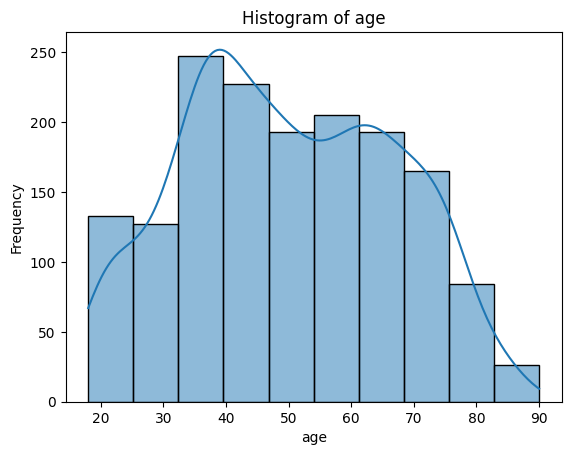

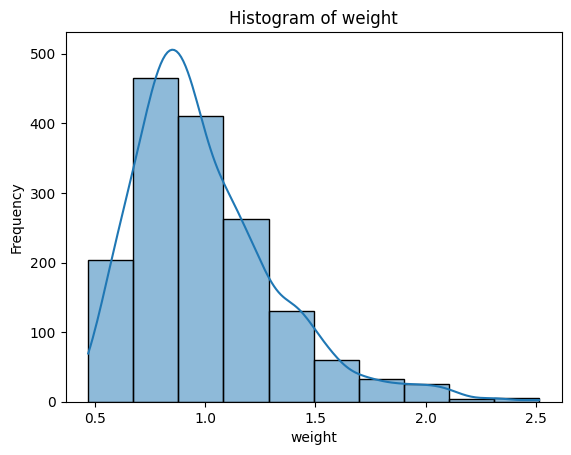

In [87]:
# Plot histograms for each column
for column in df[numerical_column_names]:
    plt.figure()
    sns.histplot(df[column], bins=10, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

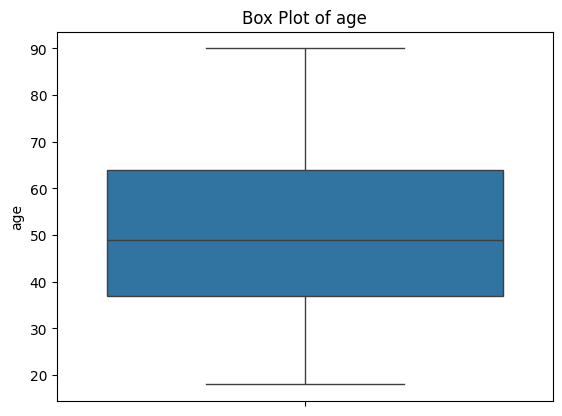

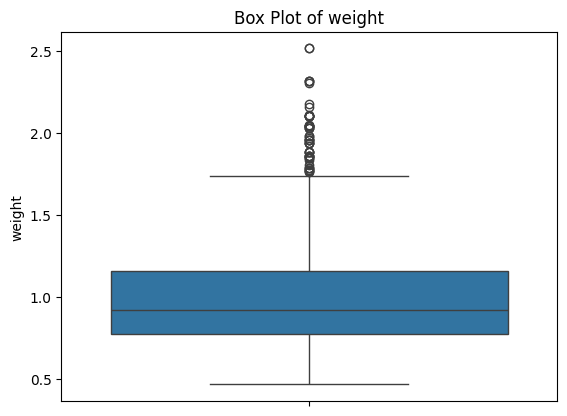

In [88]:
# Plot box plots for each column using seaborn
for column in df[numerical_column_names]:
    plt.figure()
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)
    plt.show()

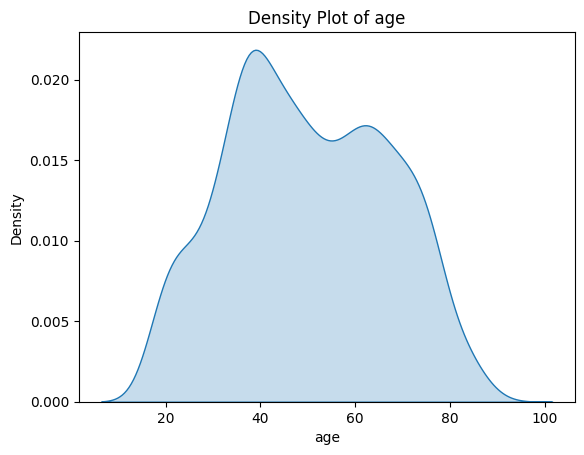

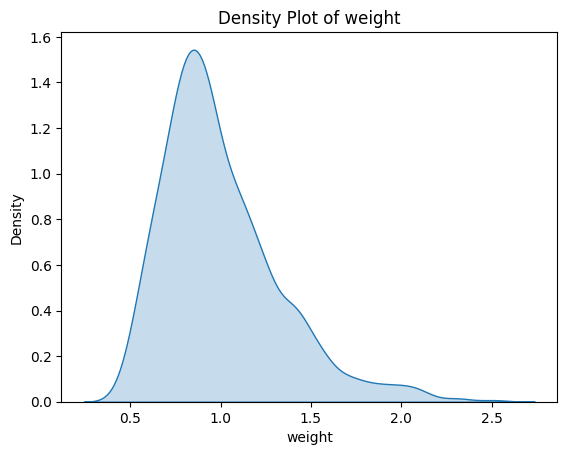

In [89]:
# Plot density plots for each column using seaborn
for column in df[numerical_column_names]:
    plt.figure()
    sns.kdeplot(df[column], shade=True)
    plt.title(f'Density Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()

In [90]:
df[numerical_column_names].describe()


,age,weight
count,1600.000000,1600.000000
mean,49.936250,1.000000
std,16.901797,0.327084
min,18.000000,0.468226
25%,37.000000,0.772224
50%,49.000000,0.921724
75%,64.000000,1.158913
max,90.000000,2.515072


In [91]:
df.weight.median()

0.92172360632897

## Observation:
AGE:
1. The mean of age column is 49.93.
2. Most numbers of the people who voted have ages ranging from 37 to 64
3. The minimum age of the voter is 18
4. The maximum age of the voter is 90
5. There are no outliers in the age column

Weight:
1. The mean of the weight column is 1.00 and the median is 0.92
2. Most numbers of the people who voted have weights ranging from 0.77 to 1.15
3. The minimum weight of the voter is 0.46
4. The maximum weight of the voter is 2.51
5. There are outliers in the weight column


## Categorical Data:


Frequency table for id:
                    id  Frequency
0     07169ed8148ce047          1
1     0716a8f7a98ceab4          1
2     0716968485ccea72          1
3     07167fa9264ceb65          1
4     07166778618ce822          1
...                ...        ...
1595  0716afc0a28cea87          1
1596  07168fbd9d4ce53f          1
1597  07167bd65a0ce094          1
1598  07168f3957cce462          1
1599  07168088318cef88          1

[1600 rows x 2 columns]



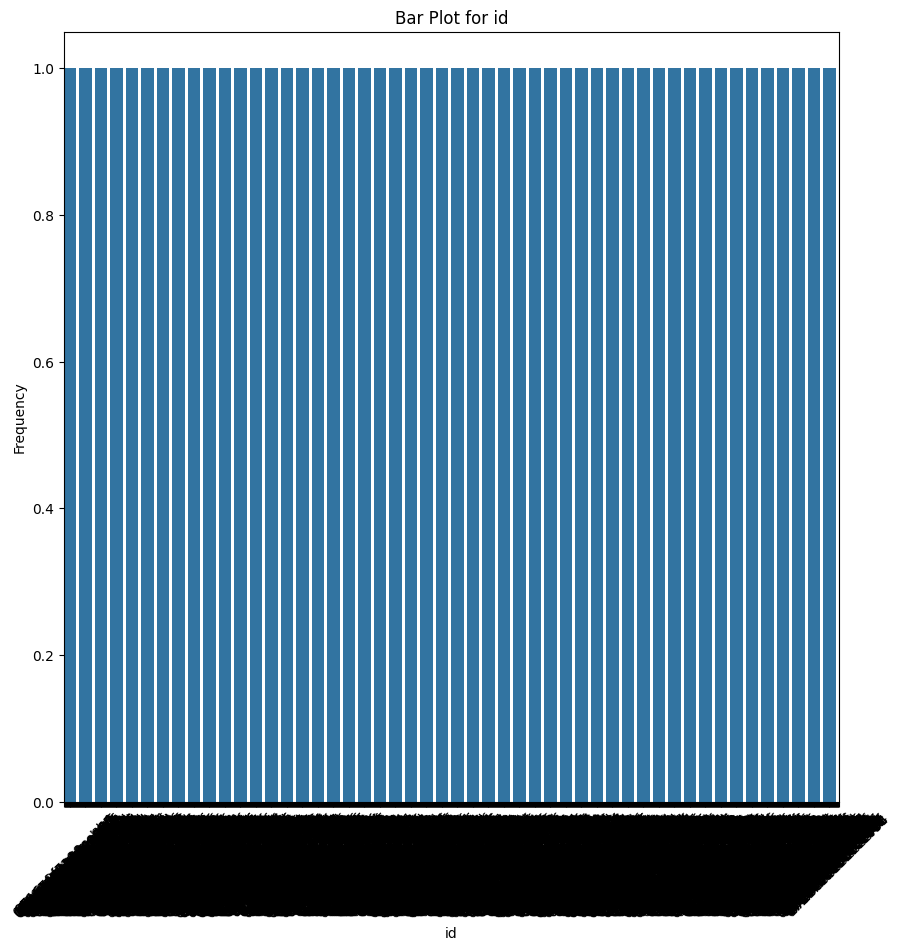

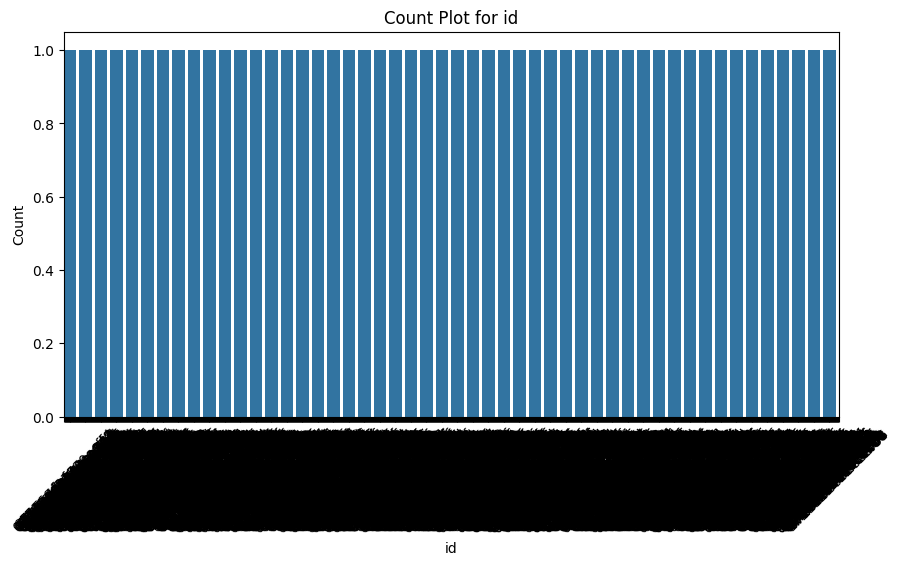

Frequency table for sex:
      sex  Frequency
0  female        843
1    male        757



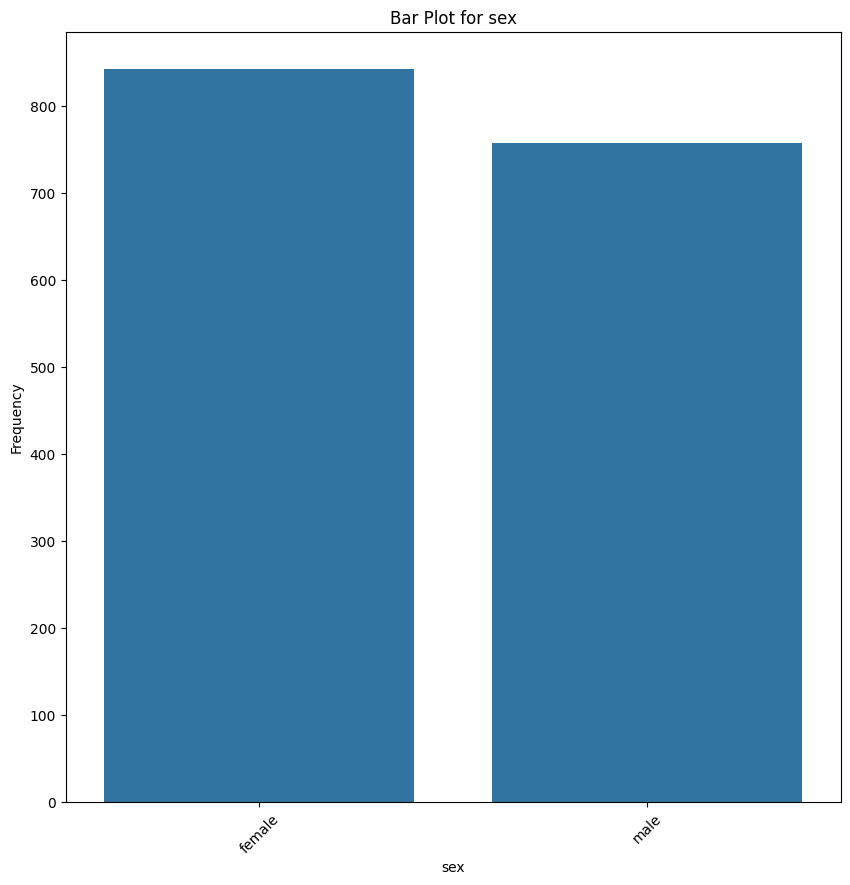

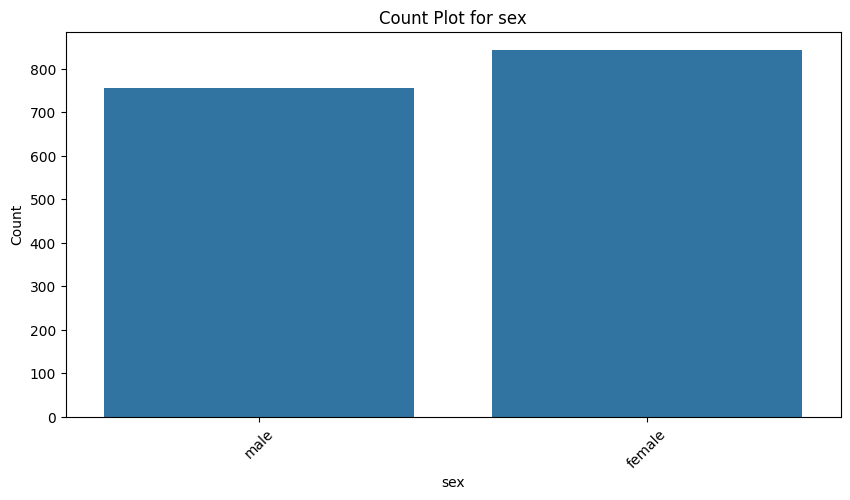

Frequency table for federal_district:
  federal_district  Frequency
0          central        425
1            volga        324
2         siberian        188
3         southern        182
4     northwestern        151
5             ural        134
6  north caucasian        107
7      far eastern         89



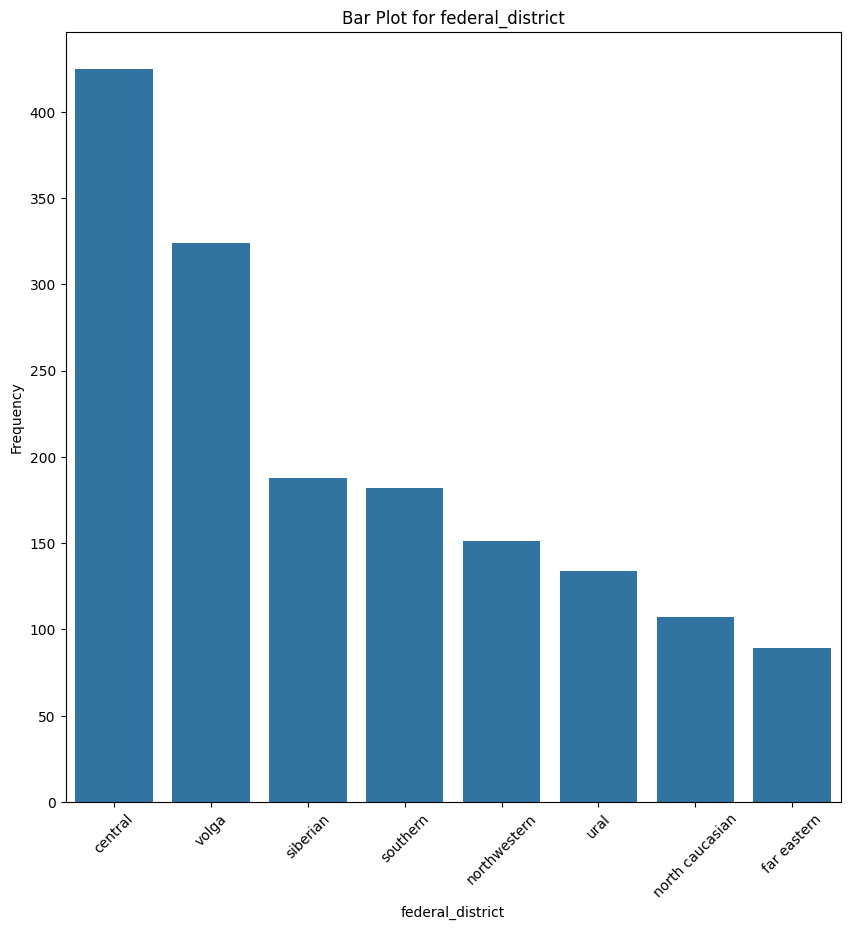

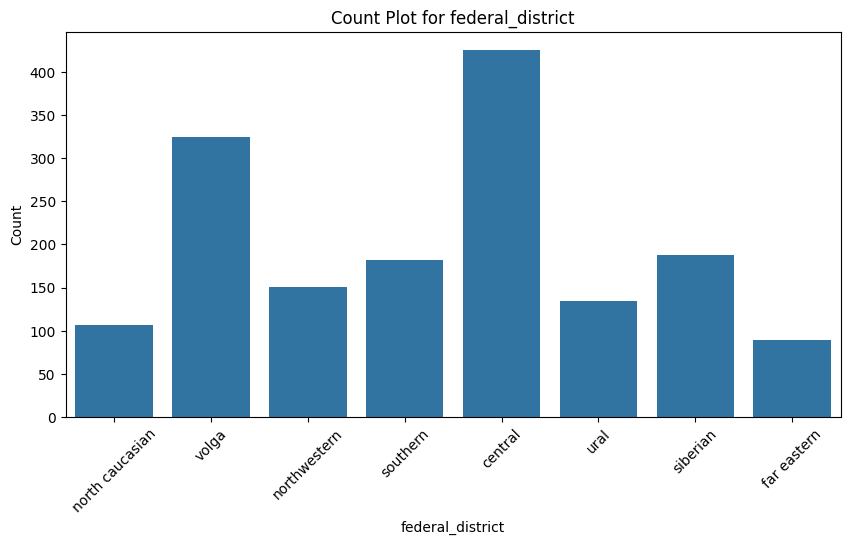

Frequency table for type_of_city:
                                   type_of_city  Frequency
0              city with population of 100-500k        391
1                                       village        366
2  city with population of 1 million and higher        307
3         city with population of less than 50k        179
4              city with population of 500-950k        170
5               city with population of 50-100k        106
6                                    settlement         81



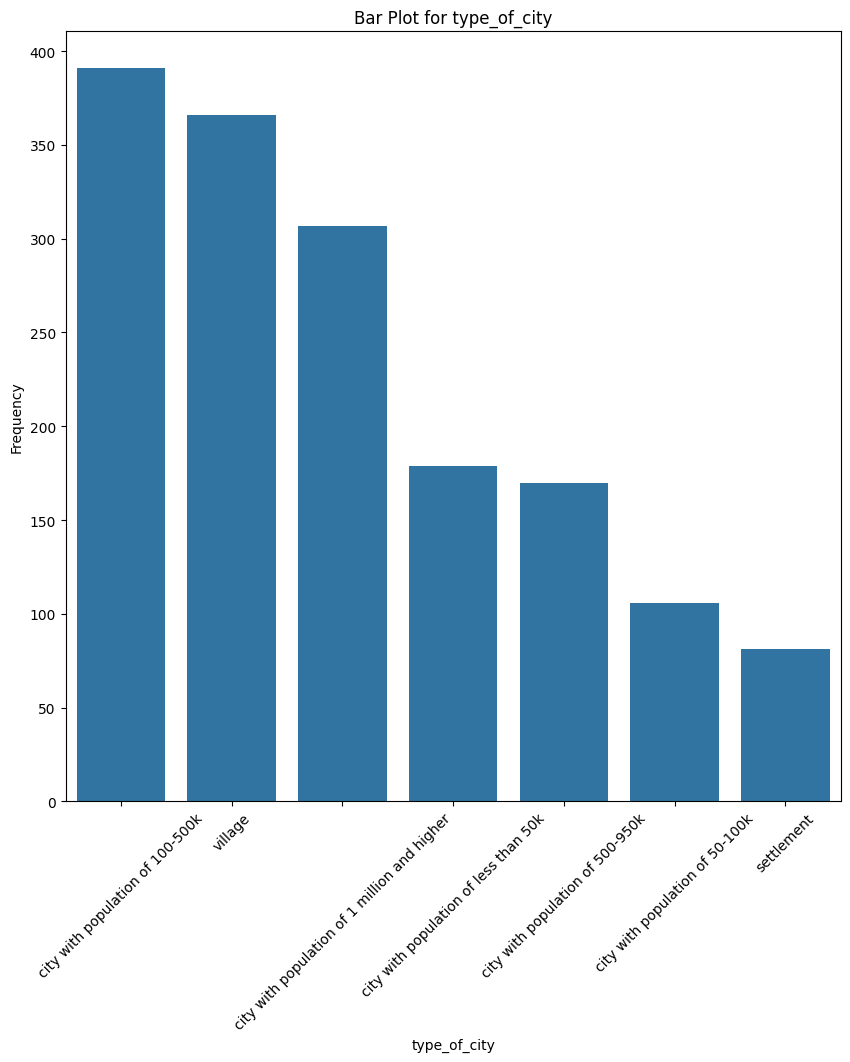

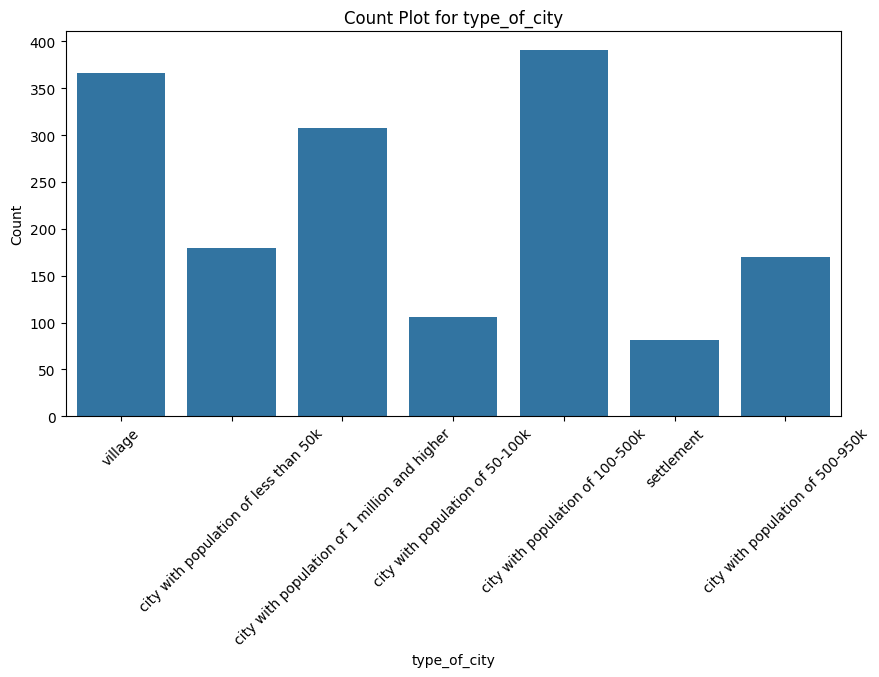

Frequency table for knows_election_date:
     knows_election_date  Frequency
0     named correct date       1361
1  not sure or no answer        165
2     named correct year         55
3           wrong answer         19



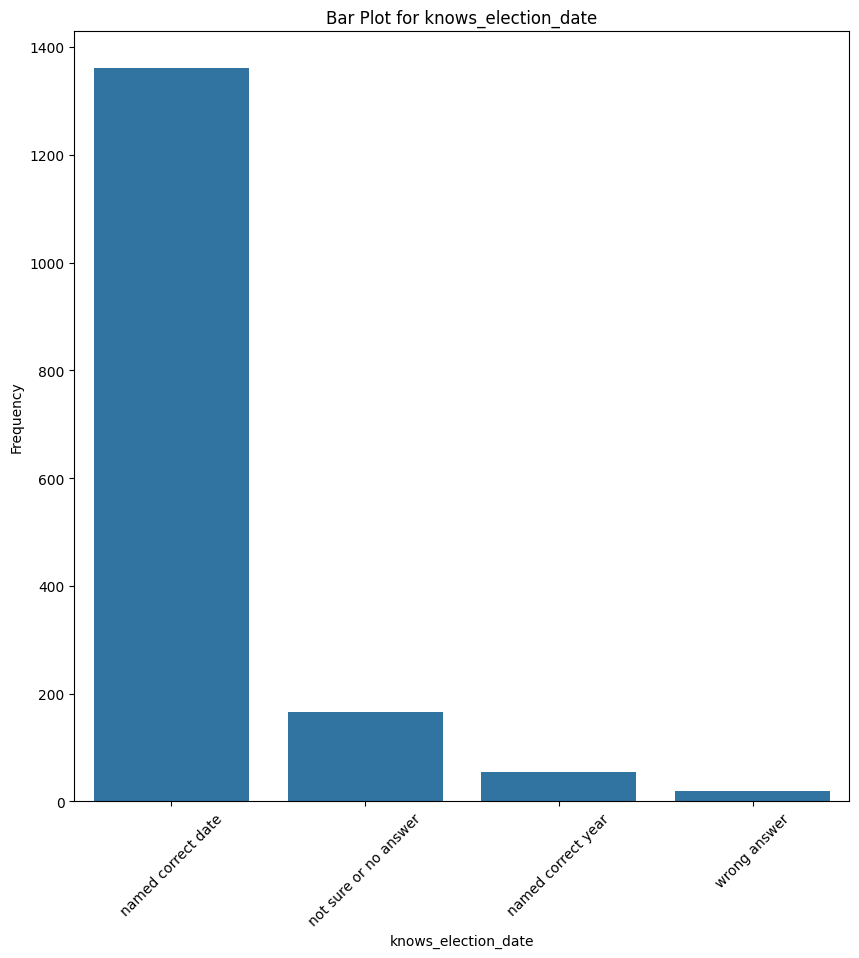

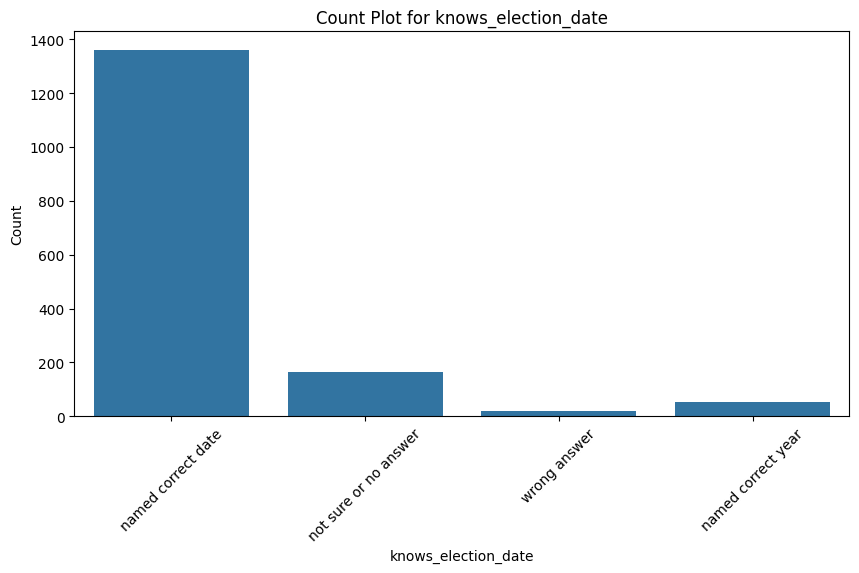

Frequency table for will_vote:
            will_vote  Frequency
0      definitely yes       1062
1          likely yes        218
2            not sure        166
3       definitely no         86
4           likely no         55
5  struggle to answer         13



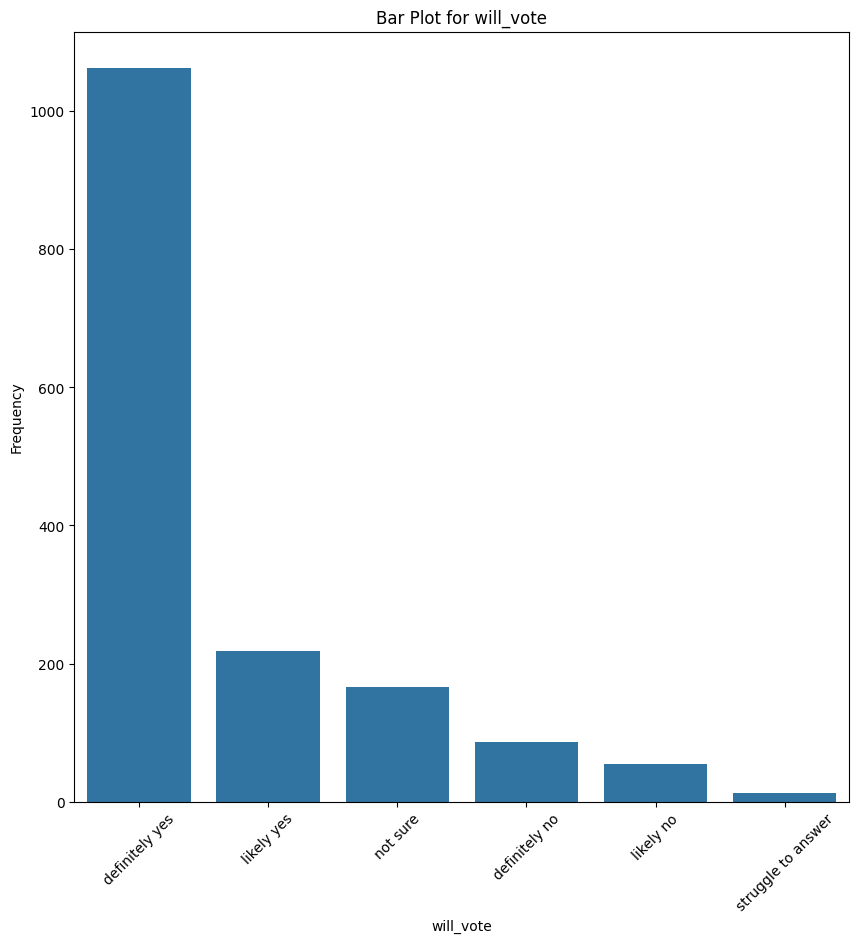

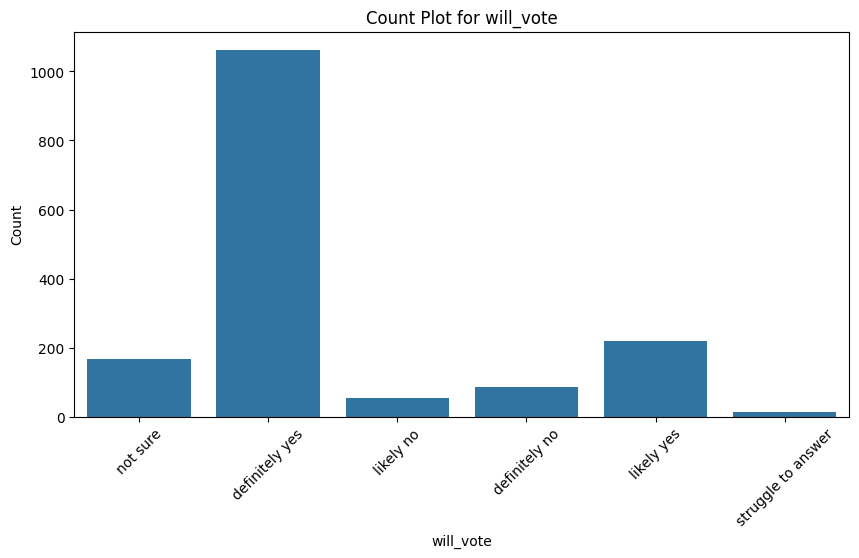

Frequency table for candidate:
            candidate  Frequency
0               Putin       1128
1  struggle to answer        164
2  will not take part         96
3            Davankov         67
4          Kharitonov         63
5            Slutskiy         55
6         spoilt vote         27



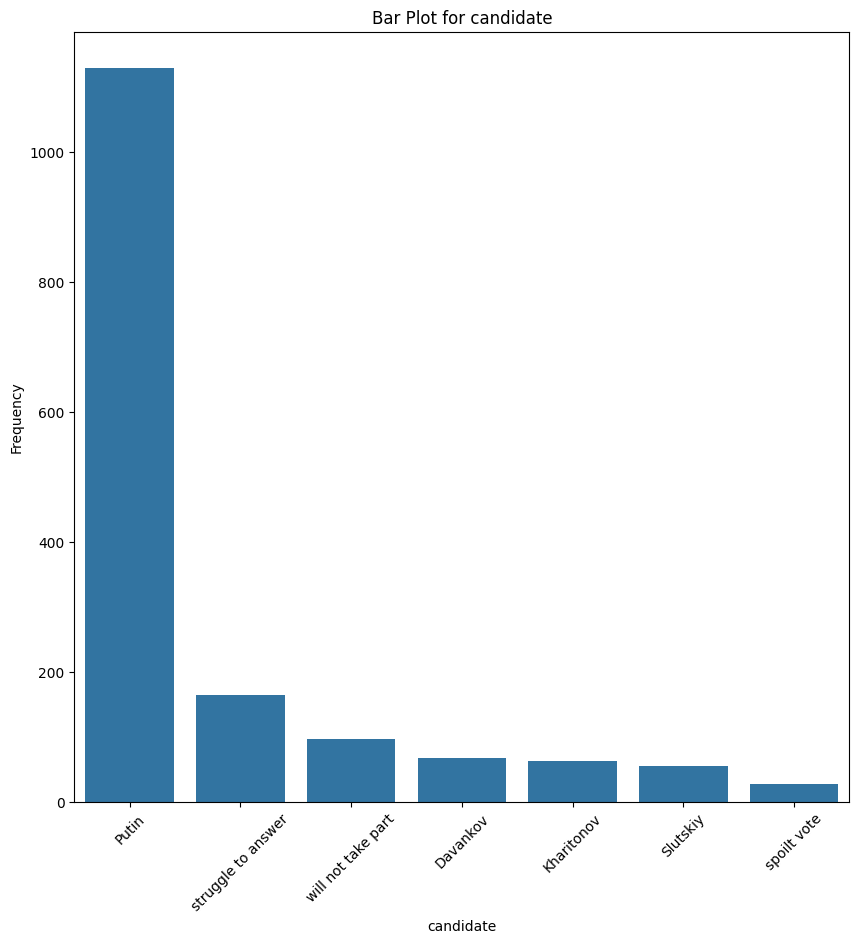

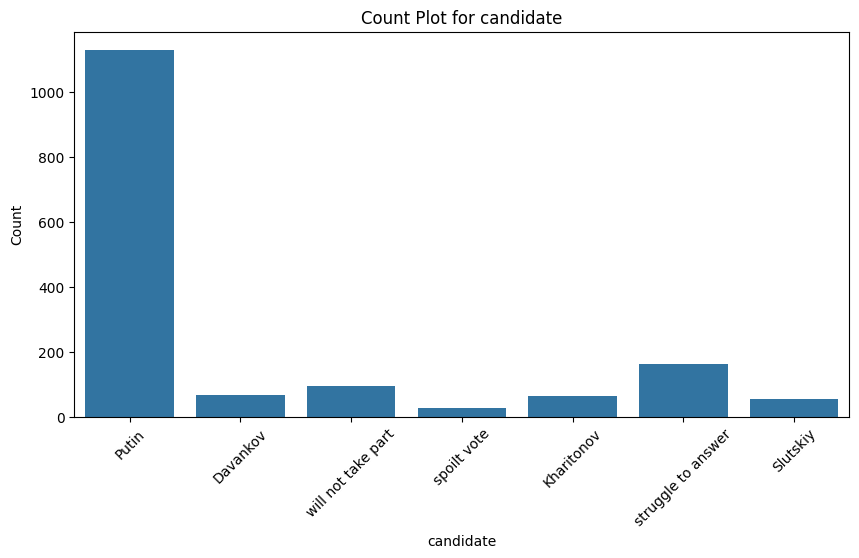

Frequency table for television_usage:
          television_usage  Frequency
0  less than 4 hours a day        490
1       over 4 hours a day        436
2           does not watch        332
3     several times a week        204
4    several times a month         76
5         once half a year         62



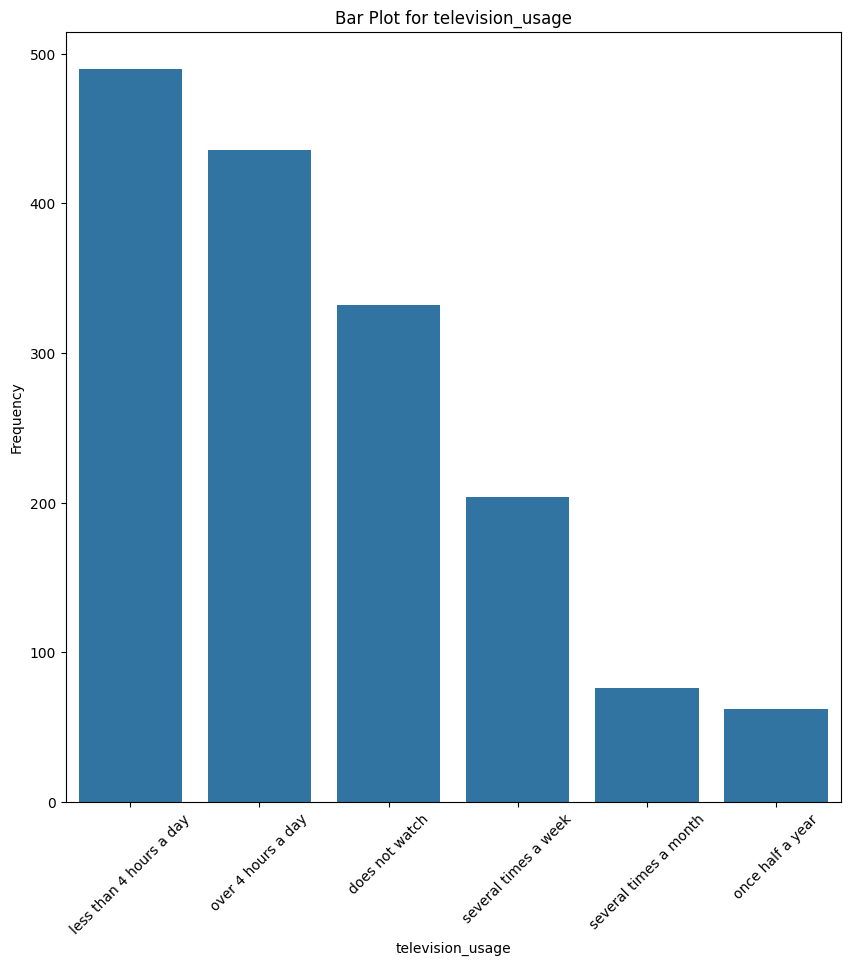

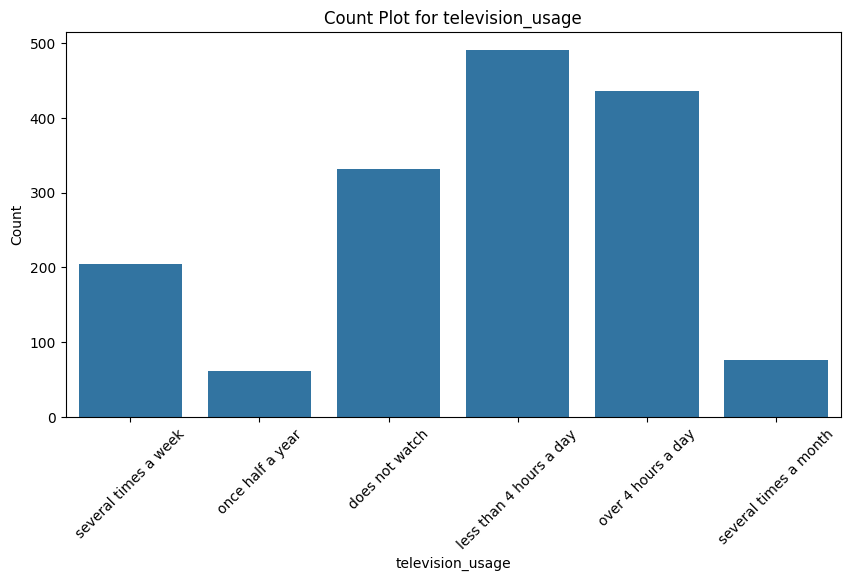

Frequency table for internet_usage:
            internet_usage  Frequency
0  less than 4 hours a day        613
1       over 4 hours a day        576
2    does not use internet        259
3     several times a week        107
4    several times a month         27
5         once half a year         18



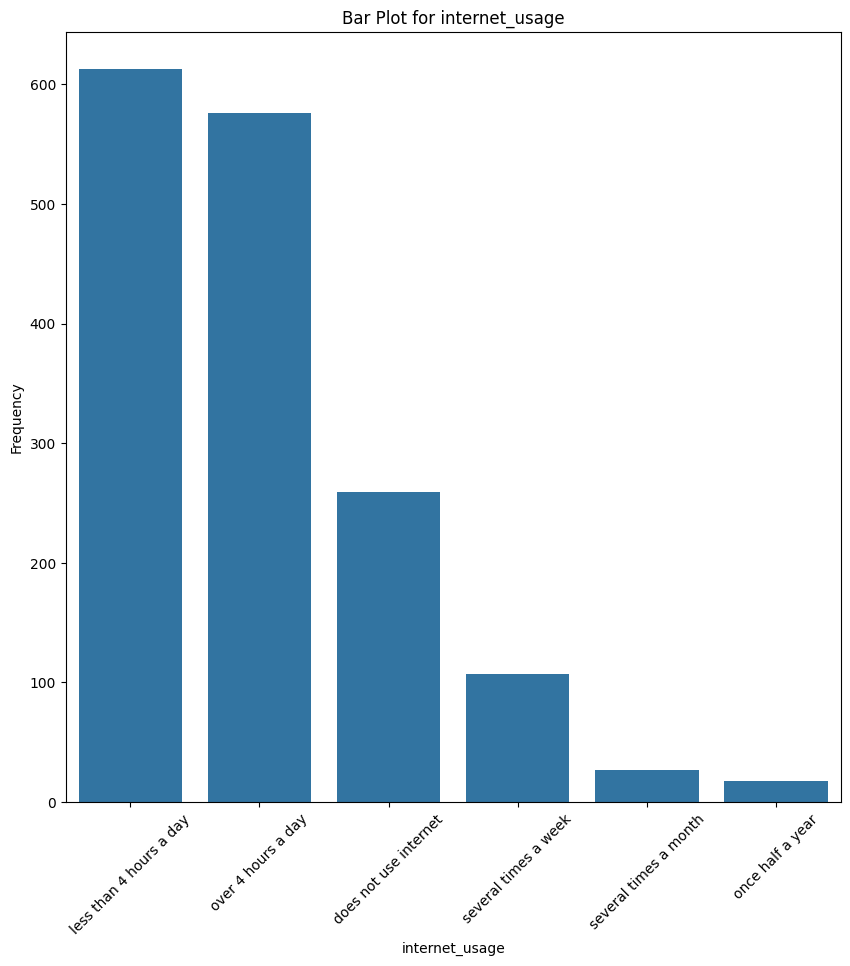

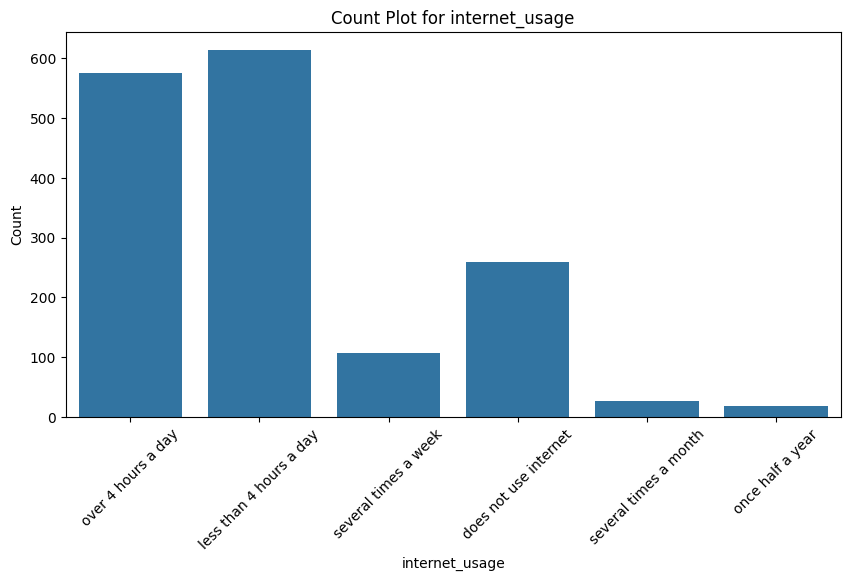

Frequency table for education:
                     education  Frequency
0                      college        690
1              bachelor degree        550
2                       school        181
3              academic degree         95
4  incomplete school education         80
5          no school education          4



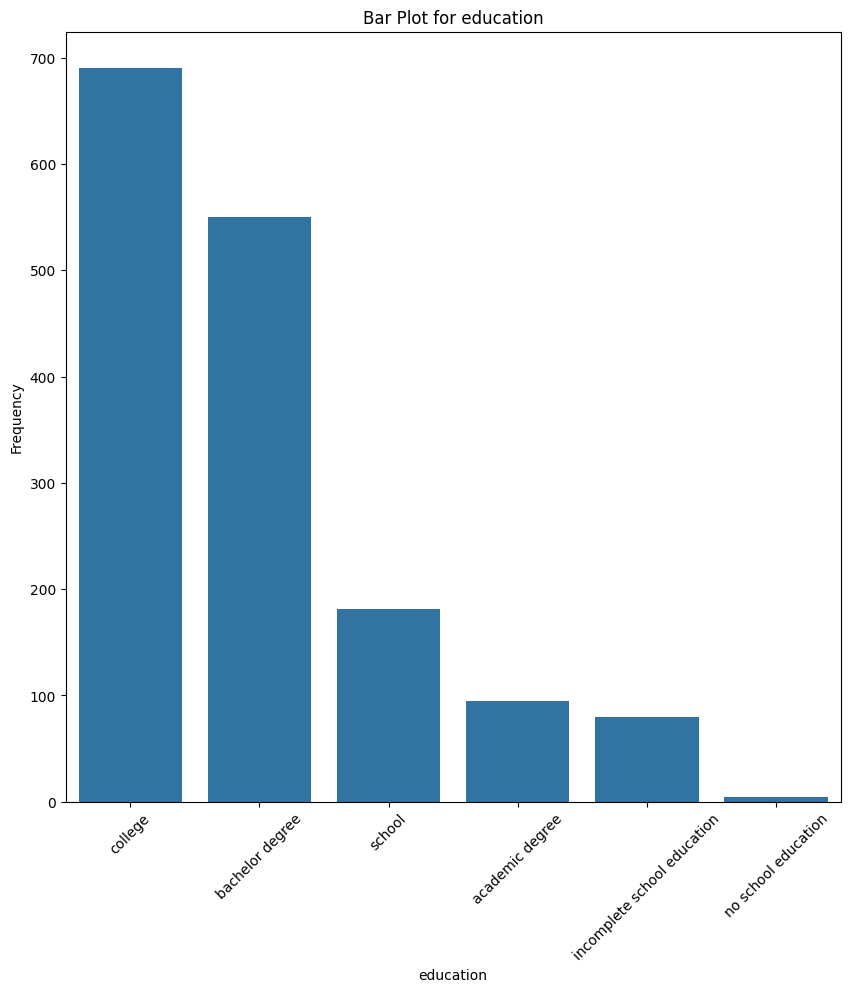

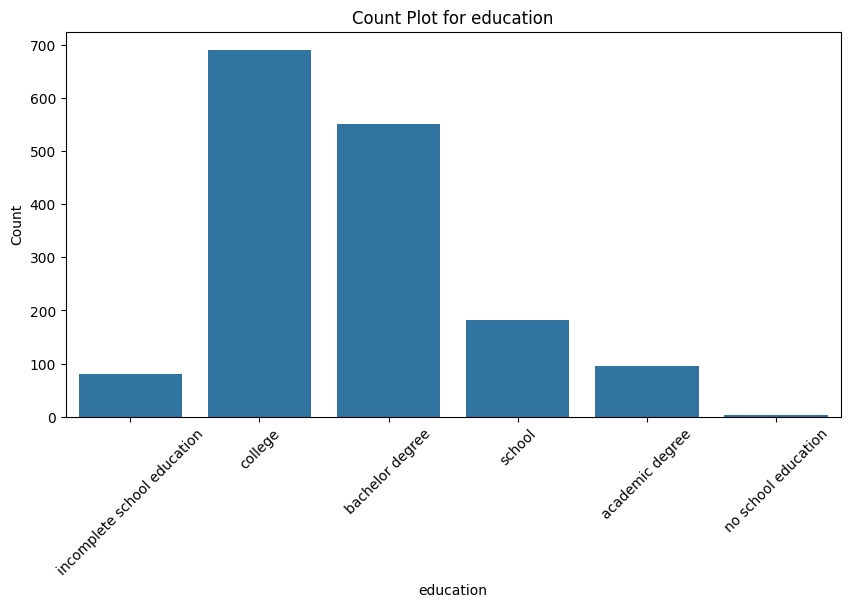

Frequency table for income:
        income  Frequency
0       medium        949
1         high        405
2          low        149
3    very high         48
4     very low         34
5  hard to say         15



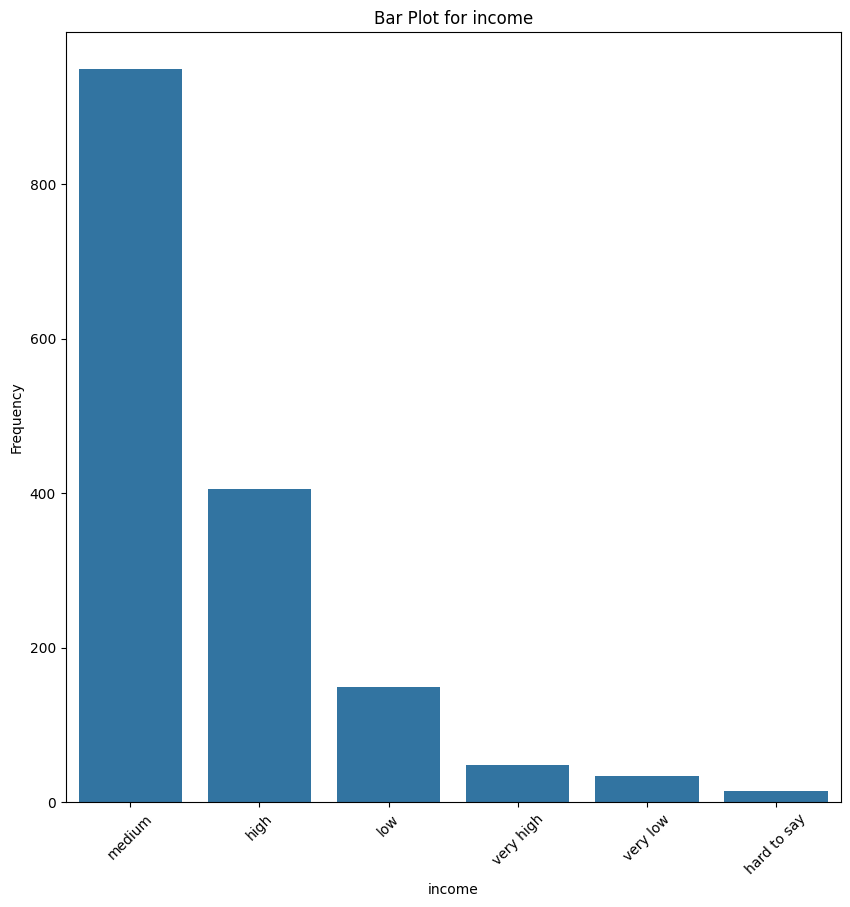

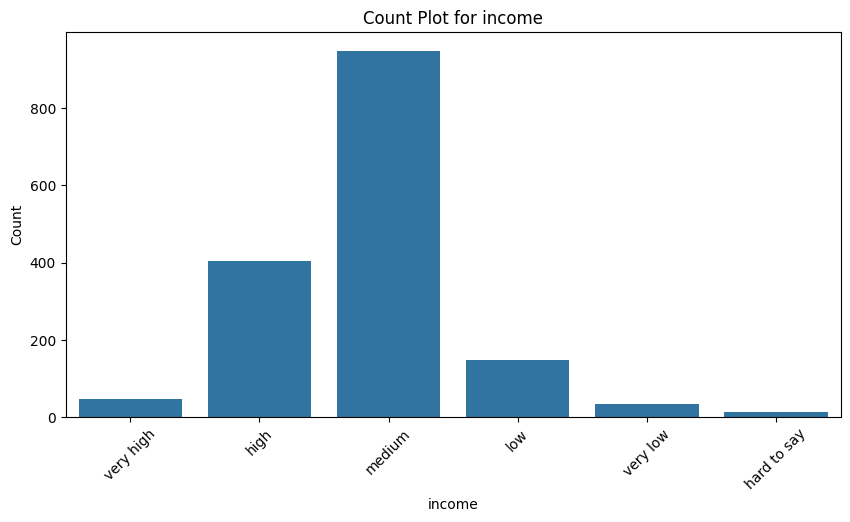

Frequency table for employment:
              employment  Frequency
0          work for hire        535
1   unemployed pensioner        502
2          self-employed        122
3     employed pensioner        120
4             unemployed        101
5           entrepreneur         87
6         parental leave         44
7       employed student         37
8     unemployed student         27
9            hard to say         22
10     refused to answer          3



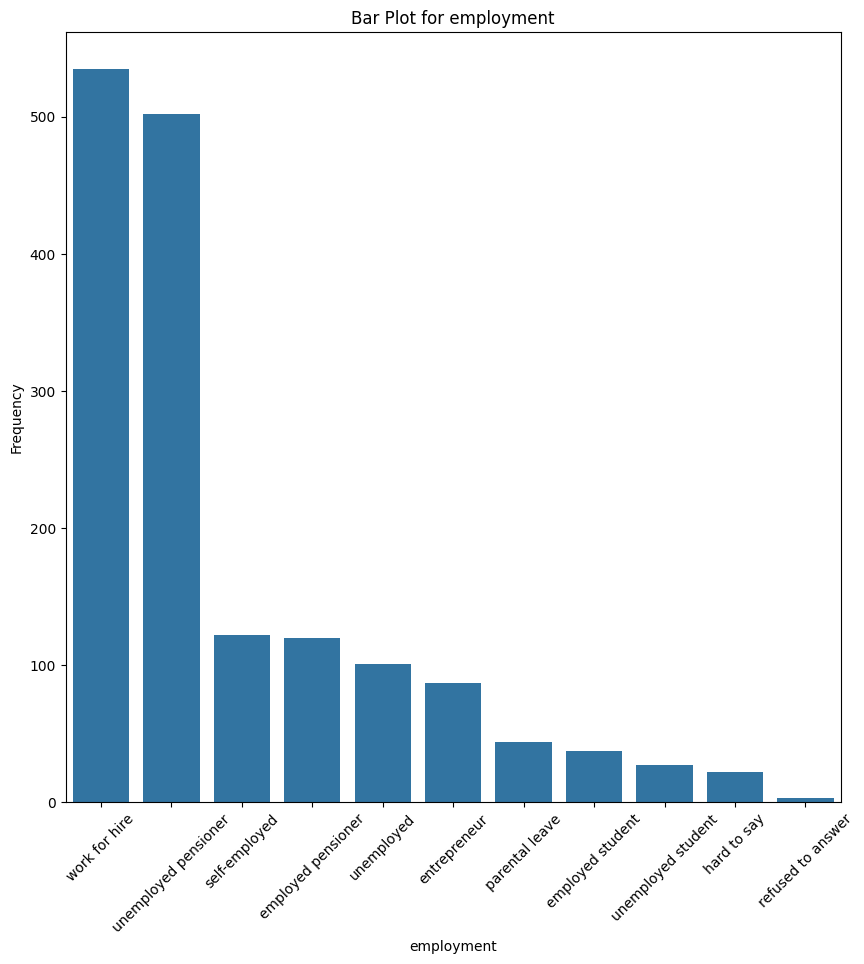

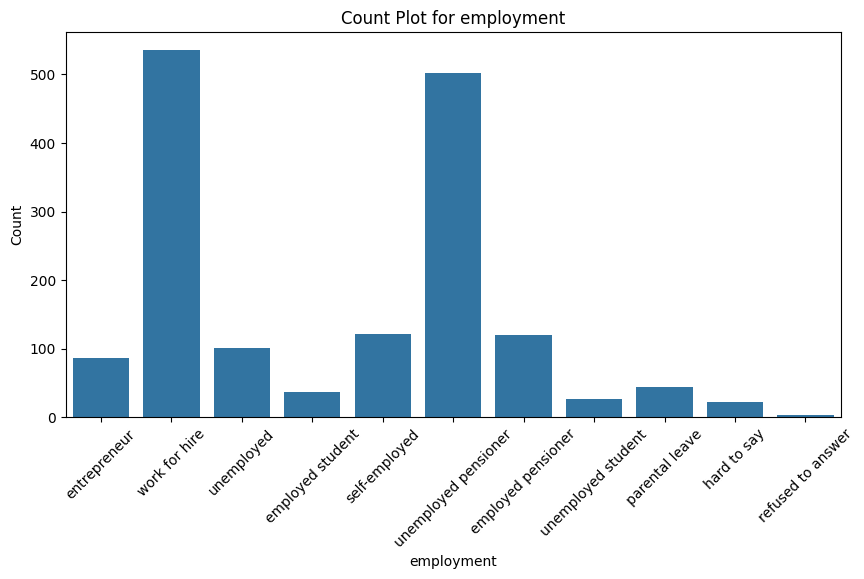

Frequency table for job_type:
                                  job_type  Frequency
0                  commercial organization       1353
1                        government agency        163
2                   law enforcement agency         33
3                        non-profit agency         22
4                              hard to say         22
5  government, management, judicial bodies          7



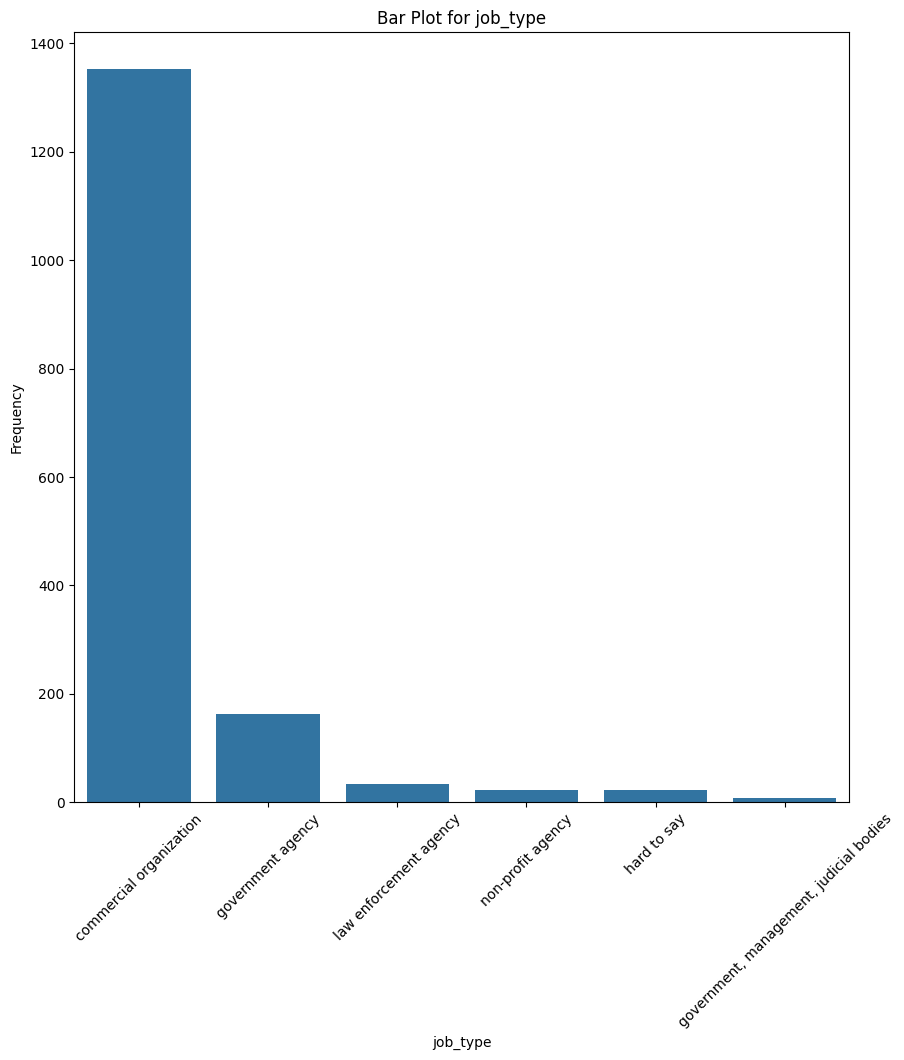

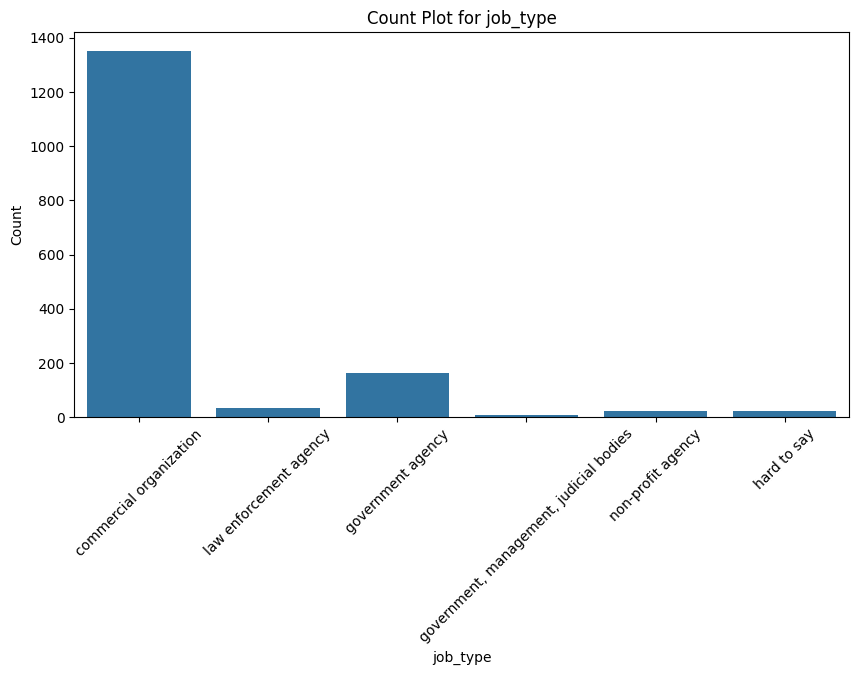

Frequency table for company_type:
                                         company_type  Frequency
0                             industry, manufacturing        859
1                                               trade        113
2                                           education         85
3   Сфера услуг, сервиса, бытового обслуживания Вк...         70
4                          construction, architecture         67
5                             transportation, storage         51
6                                             farming         44
7                              law enforcement agency         42
8                                          healthcare         39
9                                               other         39
10                  tech, programming, communications         33
11                      housing and communal services         30
12                              catering, restaurants         25
13                                           finances   

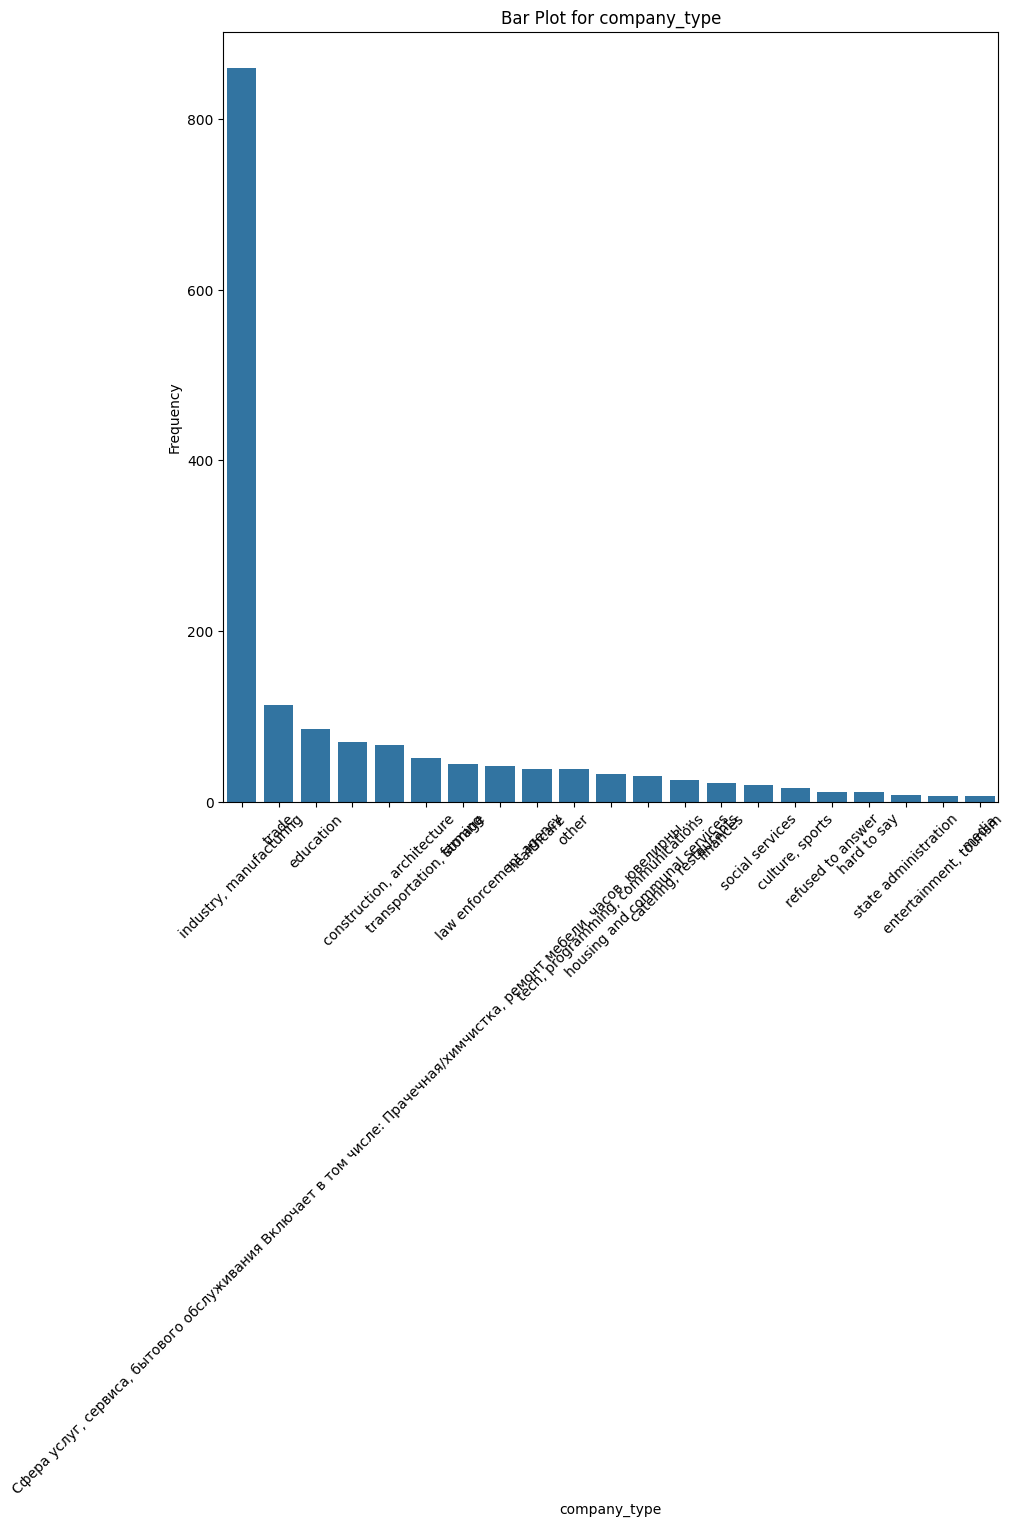

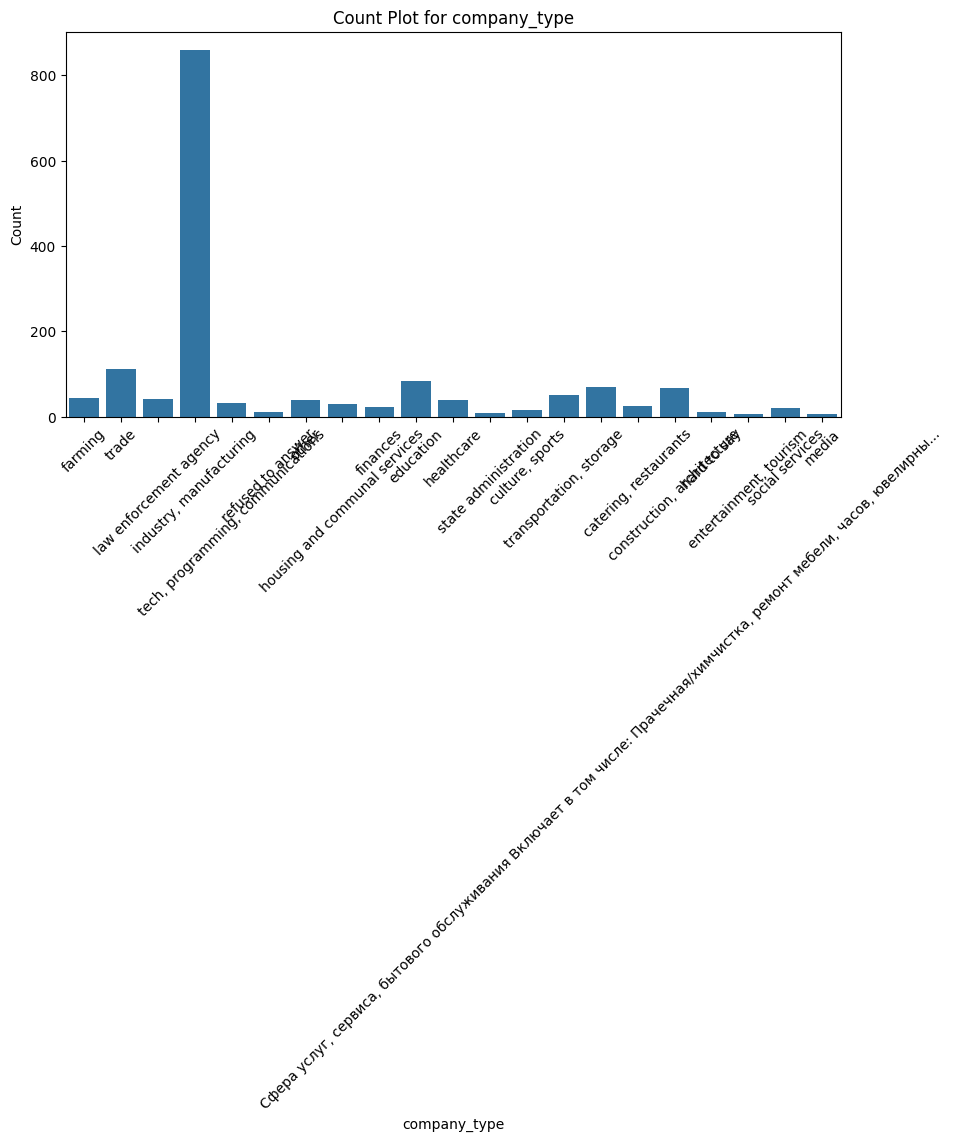

In [92]:
for column in df[object_column_names]:
    # Frequency table
    freq_table = df[column].value_counts().reset_index()
    freq_table.columns = [column, 'Frequency']
    print(f"Frequency table for {column}:\n{freq_table}\n")

    # Bar plot
    plt.figure(figsize=(10,10))
    sns.barplot(x=freq_table[column], y=freq_table['Frequency'])
    plt.title(f'Bar Plot for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)  # Rotate x-tick labels

    plt.show()

    # Count plot
    plt.figure(figsize=(10, 5))
    sns.countplot(x=column, data=df)
    plt.title(f'Count Plot for {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-tick labels

    plt.show()

## Observations

Gender:
1. Female voters are more likely to be male.

Federal district:

1. Most Votes have been casted in the central district than in other
2. The least votes have been casted in the far eastern district.
3. All the districts have almost similar numbers of voters except for Volga and central

Type of city:

1. Strangely there are more votes cast by people who are living in cities with a 100-500k population while other more populated cities are lagging behind it.

Knows election date:

1. there are very few people who don't know the election date or named it wrong.

People who will vote:

1.  there are very few people who are not gonna cast their vote.

Candidate:

1. Looks like Putin is going to win the election without any serious competition

Television usage and Internet usage::

1. The majority of the population is watching TV or using the internet.

Education:

1. Large number of the population holds a degree or some kind of education.
2. The illiteracy rate is very low in the population

Income:

1. Majority of the people have medium to high earnings
2. some outliers earn very less or very high.

Employment:

1. Large number of the population is unemployed or retired

Job type:

1. Majority of the population has been working with the commercial organization


## Bivariate Analysis

### Numerical-Numerical:

In [93]:
numerical_column_names

Index(['age', 'weight'], dtype='object')

In [94]:
object_column_names

Index(['id', 'sex', 'federal_district', 'type_of_city', 'knows_election_date',
       'will_vote', 'candidate', 'television_usage', 'internet_usage',
       'education', 'income', 'employment', 'job_type', 'company_type'],
      dtype='object')

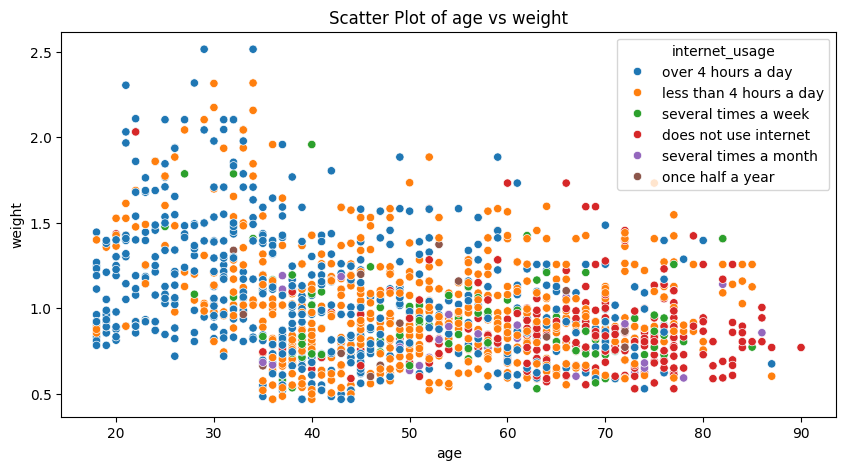

In [95]:
# Scatter plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x='age', y='weight', hue='internet_usage', data=df)
plt.title('Scatter Plot of age vs weight')
plt.xlabel('age')
plt.ylabel('weight')
plt.show()

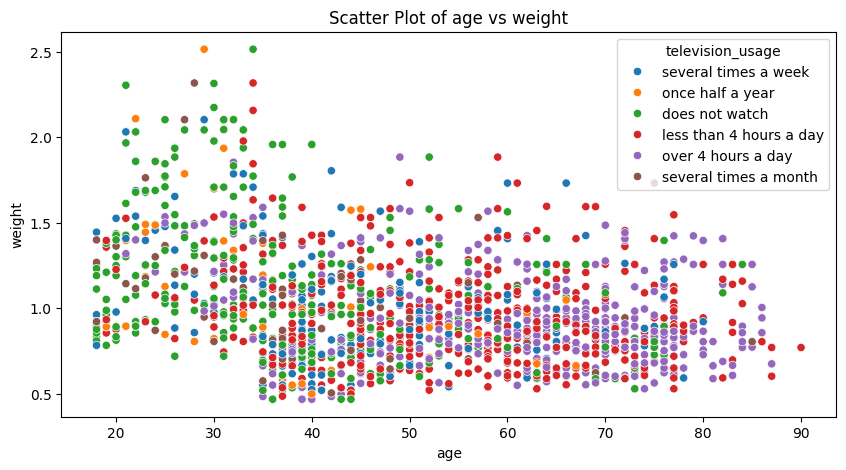

In [96]:
# Scatter plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x='age', y='weight', hue='television_usage', data=df)
plt.title('Scatter Plot of age vs weight')
plt.xlabel('age')
plt.ylabel('weight')
plt.show()

## Observation

Internet usage:

1. Young people tend to spend most of their day on the internet.
2. The young population has more weight compared to the older one.
3. The older generation uses less internet and the oldest of them does not use it at all

Television usage:

1. The youngest generation does not watch TV
2. The Older generation watches TV for an average of 4 hours a day


## Numerical-Categorical

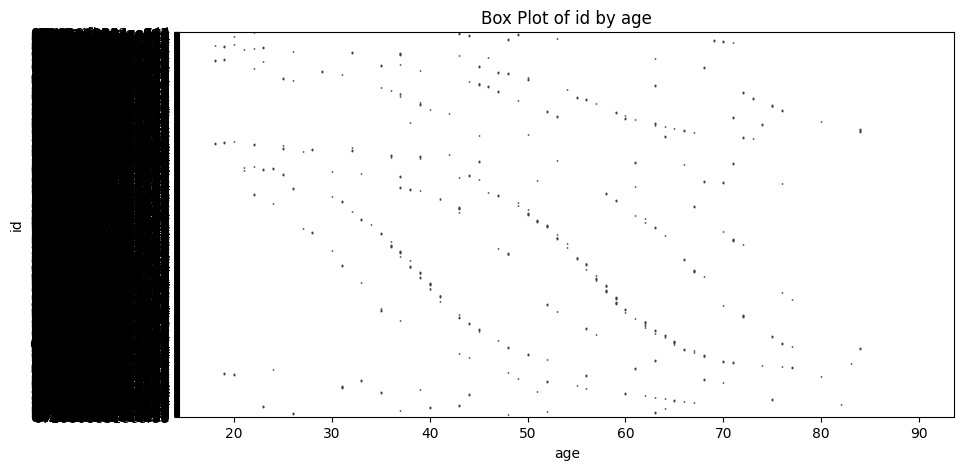

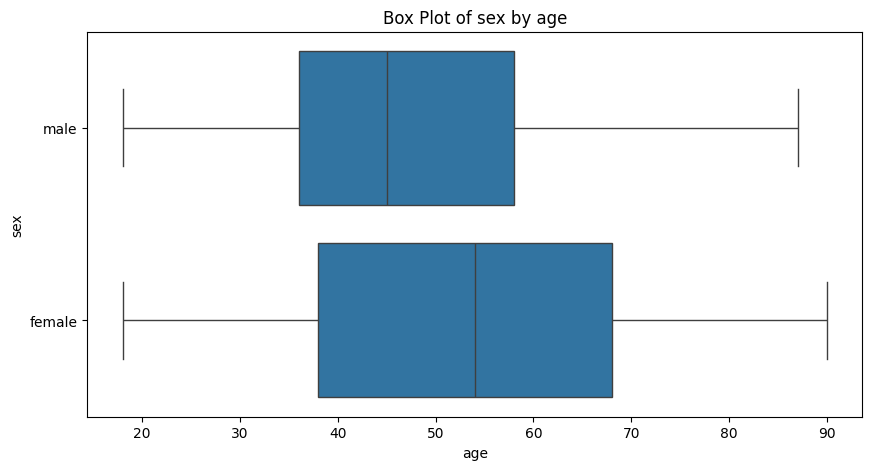

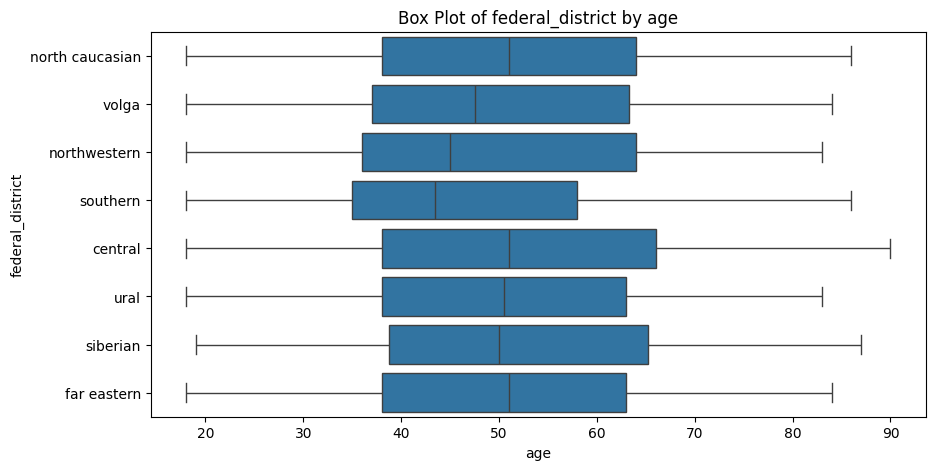

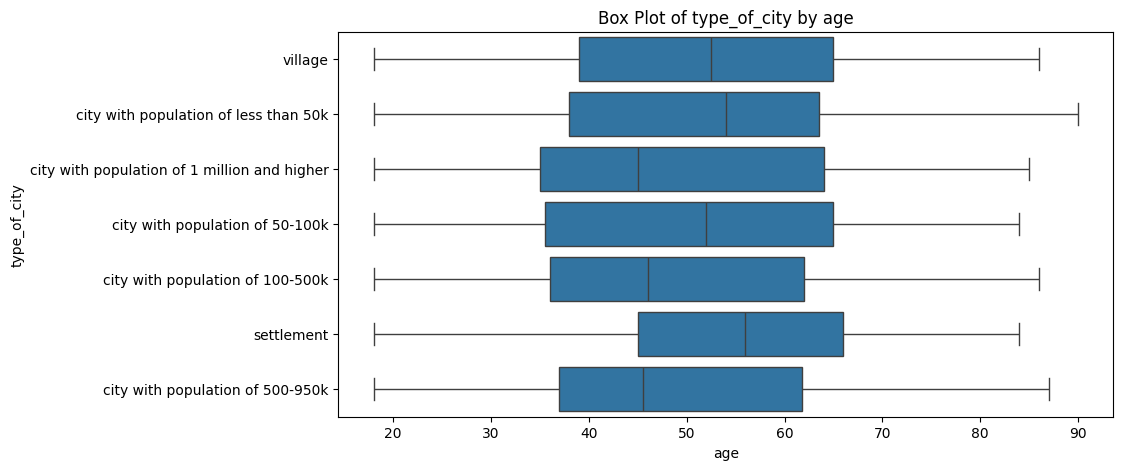

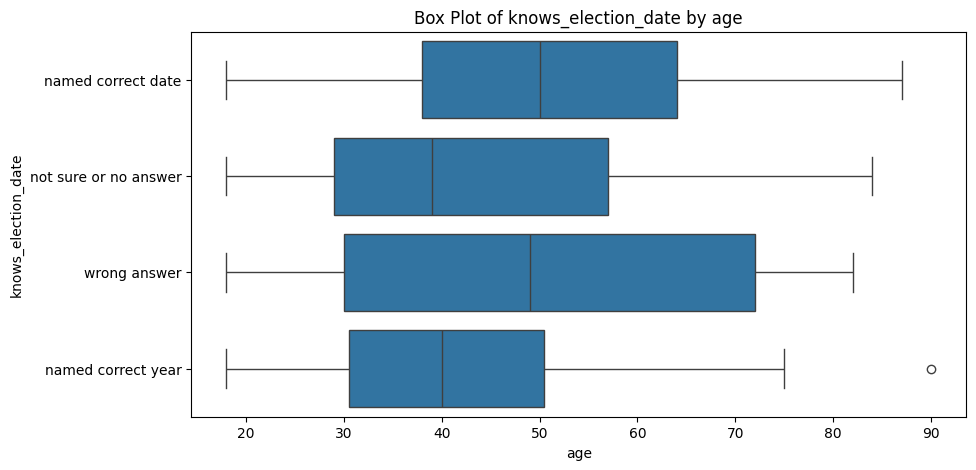

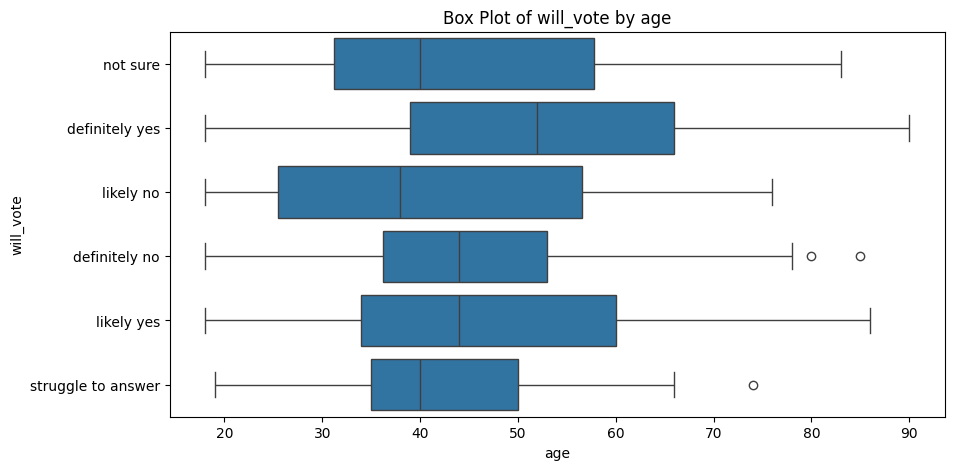

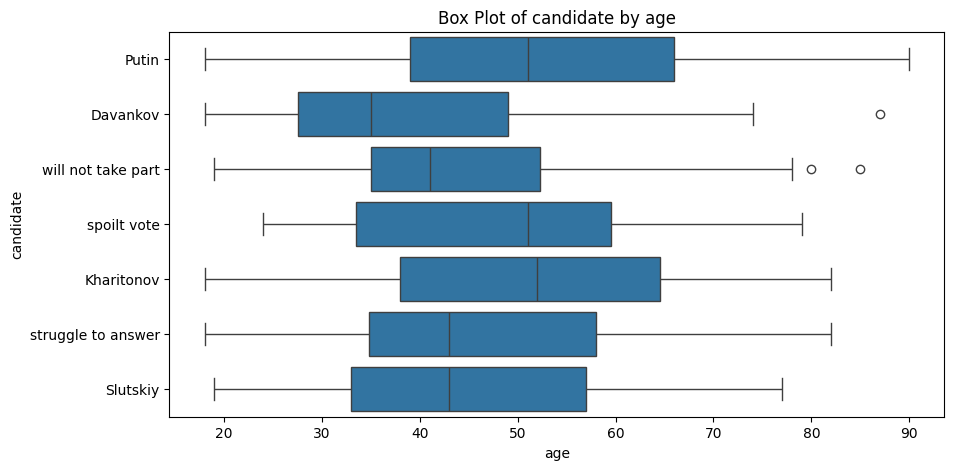

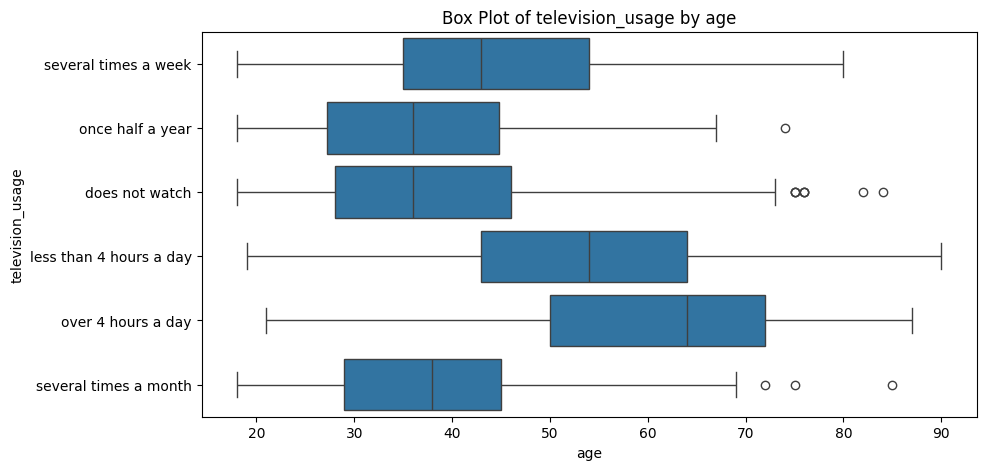

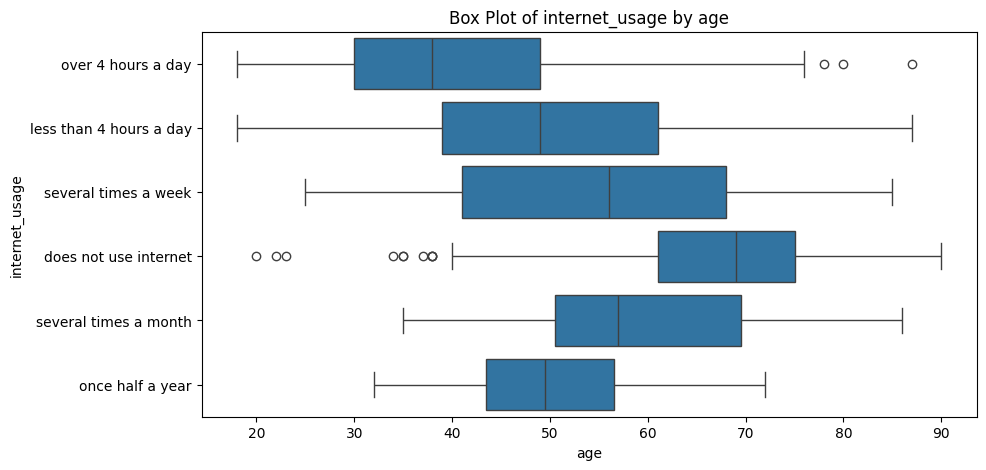

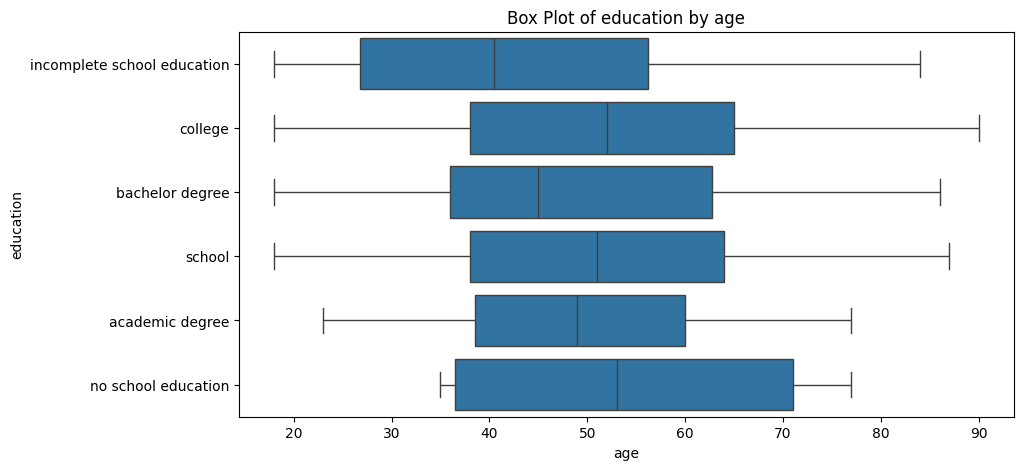

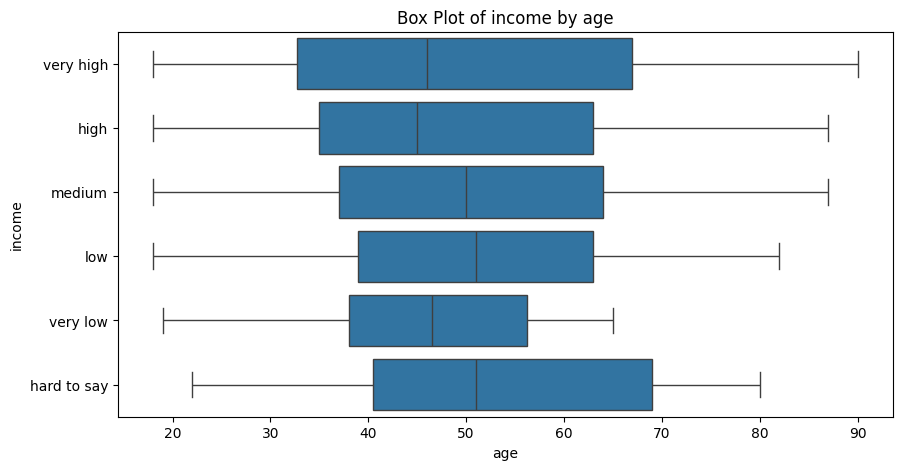

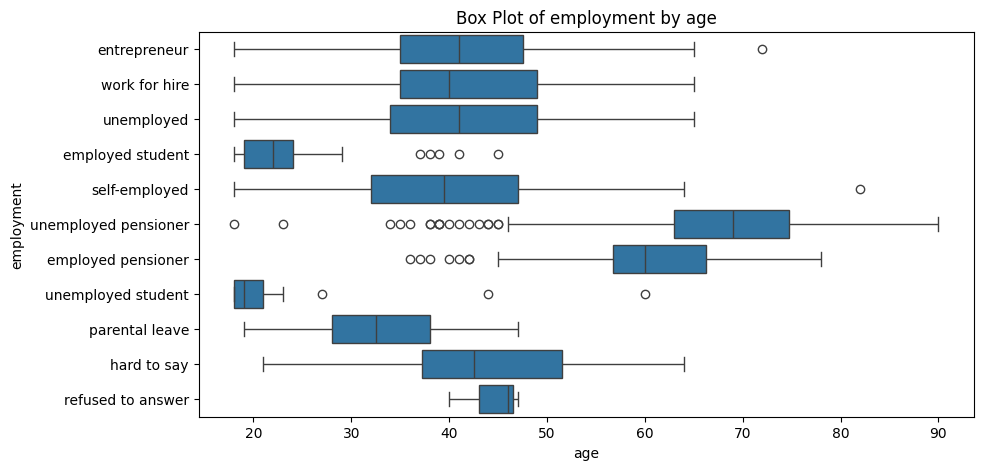

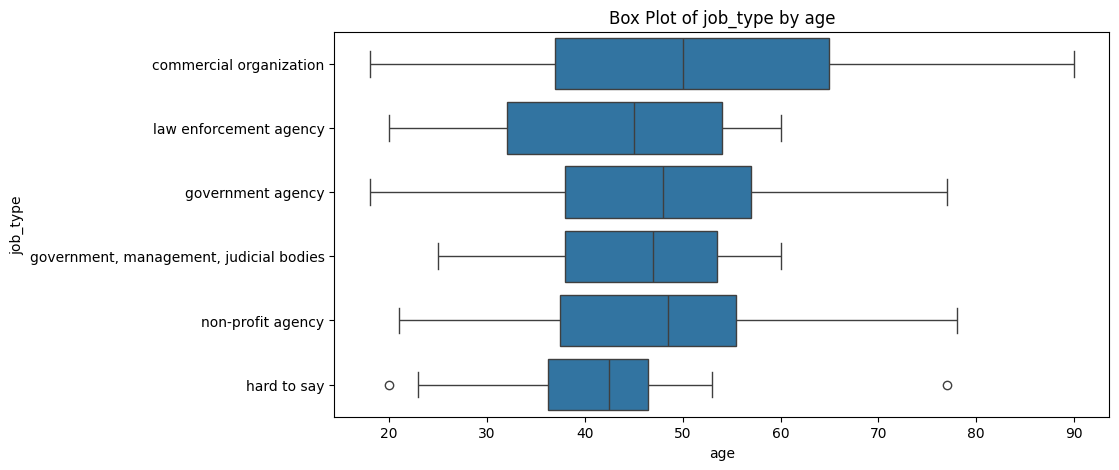

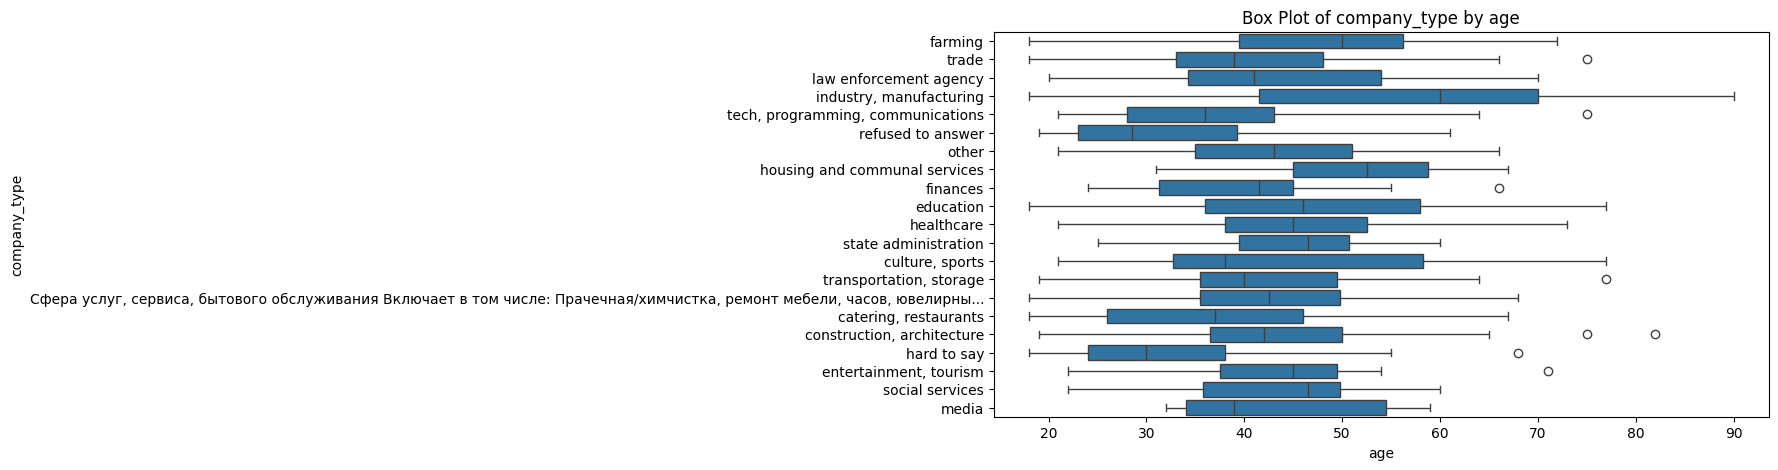

In [97]:
# Box plot
for column in df[object_column_names]:
    # plt.figure(figsize=(10, 5))
    # sns.boxplot(x=column, y="age", data=df)
    # plt.title(f'Box Plot of {column} by Age')
    # plt.xlabel('age')
    # plt.ylabel(column)
    # plt.show()
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='age', y=column, data=df)
    plt.title(f'Box Plot of {column} by age')
    plt.xlabel('age')
    plt.ylabel(column)
    plt.show()

## Observation

1. Most of the female voters are around 40 to 70 age
2. There are large numbers of people in bigger cities with ages of 40-50
3. Most of the uneducated people are ranging 40-70 age


## Outlier Detection

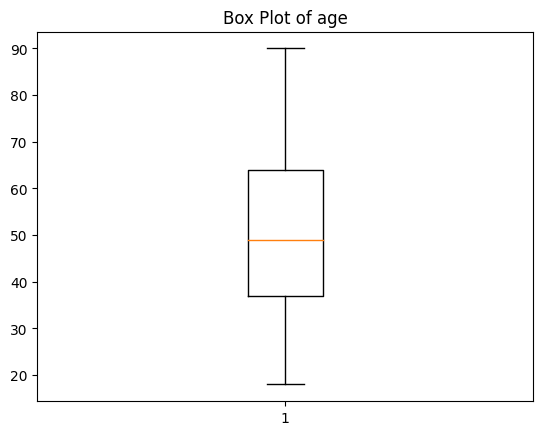

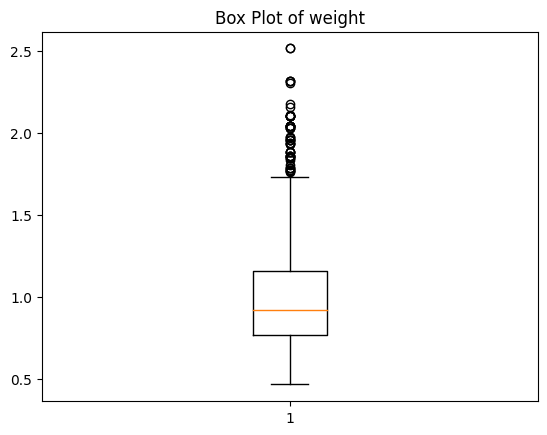

In [98]:
for column in df[numerical_column_names]:
    plt.boxplot(df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

Handling Outliers in weight column

In [99]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['weight'].quantile(0.25)
Q3 = df['weight'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and fill outliers
df['weight'] = df['weight'].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

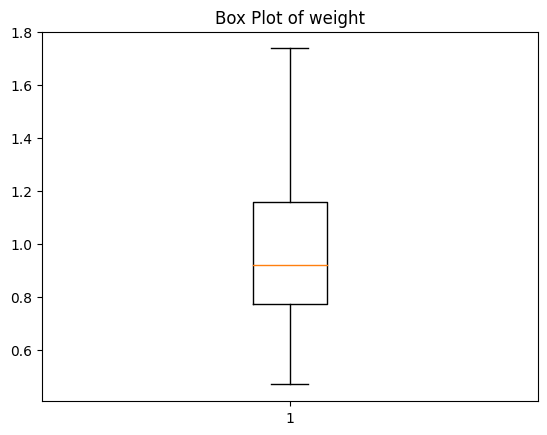

In [100]:
plt.boxplot(df['weight'])
plt.title(f'Box Plot of weight')
plt.show()

## Convert categorical data to numerical

In [101]:
df.drop("id",axis=1,inplace=True)

In [104]:
df.head()

,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight
0,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,commercial organization,farming,1.445172
1,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade,1.445172
2,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency,1.301691
3,male,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,commercial organization,"industry, manufacturing",1.538628
4,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,commercial organization,"tech, programming, communications",1.738947


In [106]:
object_column_names = df.select_dtypes(include=['object']).columns
print("Object Column Names:")
print(object_column_names)

Object Column Names:
Index(['sex', 'federal_district', 'type_of_city', 'knows_election_date',
       'will_vote', 'candidate', 'television_usage', 'internet_usage',
       'education', 'income', 'employment', 'job_type', 'company_type'],
      dtype='object')


In [107]:
# Create a LabelEncoder object
le = LabelEncoder()

# Encode each categorical column
for col in object_column_names:
    df[col] = le.fit_transform(df[col].astype(str))



In [108]:
df.head()

,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight
0,1,18.0,2,6,0,4,2,5,3,3,4,2,0,5,1.445172
1,1,23.0,2,6,0,4,2,2,3,2,4,10,0,18,1.445172
2,1,20.0,7,4,0,1,2,5,3,2,4,10,4,11,1.301691
3,1,22.0,3,0,2,4,0,5,3,2,4,7,0,10,1.538628
4,1,21.0,5,0,0,1,2,0,3,1,4,1,0,17,1.738947


##  Split Data into Training and Testing Sets

In [114]:

X = df.drop('sex', axis=1)  # Features
y = df['sex']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [116]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1280, 14), (320, 14), (1280,), (320,))

Create a model

In [126]:
#model = LogisticRegression()
model = SVC(kernel='linear')  # You can change the kernel

model.fit(X_train, y_train)


SVC(kernel='linear')

 Model Evaluation


In [127]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.659375


Create RFE object

In [128]:
rfe = RFE(model, n_features_to_select=9)  # Adjust n_features_to_select as needed


In [129]:
fit = rfe.fit(X, y)


In [130]:
print("Num Features: ", fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: ", fit.ranking_)


Num Features:  9
Selected Features:  [ True False  True False  True  True False  True  True  True False  True
 False  True]
Feature Ranking:  [1 4 1 2 1 1 3 1 1 1 5 1 6 1]


In [131]:
y_pred = rfe.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.653125


Columns used in model

In [132]:
X.columns[fit.support_]

Index(['age', 'type_of_city', 'will_vote', 'candidate', 'internet_usage',
       'education', 'income', 'job_type', 'weight'],
      dtype='object')